# IMPORTING LIBRARY AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv('E:\Lentra\Lending_TRAINING_DATA.csv')
test = pd.read_csv('E:\Lentra\Lending_TEST_DATA.csv')

In [2]:
# print(train.isnull().sum())
# print(test.isnull().sum())

# THERE ARE 7759 ROWS IN TRAINING DATASET AND IN BELOW COLUMNS, MORE THAN 7000 ROWS ARE NULL HENCE CAN BE DROPPED
#NET.TAKE.HOME.SALARY             7156
#DEDUPE.REF.ID1                   7740
#CAR.CATEGORY                     7753
#TRADER.YEAR.IN.BUSINESS          7661
#TRADER.BUSINESS.PROOF            7661
#CREDIT.CARD.NUMBER               7399
#CREDIT.CARDS.CATEGORY            7399

# ALSO BELOW ATTRIBUTES MAY NOT BE CONTRIBUTING TO PREDICT THE #APPLICATION STATUS AND NULL VALUES IN THESE COLUMN ARE #APPROXIMATELY 50 PERCENT
#RESIDENTIAL.ADDRESS.SCORE        1624
#OFFICE.ADDRESS.SCORE             1623
#NAME.SCORE                       5372
#APPROVED.AMOUNT                  4421
#ASSET.MAKE                       4421
#ASSET.CTG                        4421
#OWN.HOUSE.TYPE                   3956
#HOUSE.SURROGATE.DOCUMENT.TYPE    3956

#IN THIS SEP, WE ARE DOING FEATURE SELECTION BY DROPPING NULL AND IRREVELENT COLUMNS

In [3]:
Train = train.drop(['NET.TAKE.HOME.SALARY','DEDUPE.REF.ID1','CAR.CATEGORY','TRADER.YEAR.IN.BUSINESS','TRADER.BUSINESS.PROOF','CREDIT.CARD.NUMBER',
'CREDIT.CARDS.CATEGORY','RESIDENTIAL.ADDRESS.SCORE','OFFICE.ADDRESS.SCORE','NAME.SCORE','APPROVED.AMOUNT','ASSET.MAKE',
'ASSET.CTG','OWN.HOUSE.TYPE','HOUSE.SURROGATE.DOCUMENT.TYPE'], axis=1)

Test = test.drop(['NET.TAKE.HOME.SALARY','DEDUPE.REF.ID1','CAR.CATEGORY','TRADER.YEAR.IN.BUSINESS','TRADER.BUSINESS.PROOF','CREDIT.CARD.NUMBER',
'CREDIT.CARDS.CATEGORY','RESIDENTIAL.ADDRESS.SCORE','OFFICE.ADDRESS.SCORE','NAME.SCORE','APPROVED.AMOUNT','ASSET.MAKE',
'ASSET.CTG','OWN.HOUSE.TYPE','HOUSE.SURROGATE.DOCUMENT.TYPE'], axis=1)

# NULL HANDLING
#CONSIDERING NATURE OF ATTRIBUTES OR FEATURES, NULL VALUES ARE REPLACED WITH MOST REPEATED VALUE


In [4]:
# Train.isnull().sum()

In [5]:
# Test.isnull().sum()

In [6]:
Train['PAN.STATUS'].fillna(Train['PAN.STATUS'].mode()[0],inplace=True)
Train['APPLICATION.SCORE'].fillna(Train['APPLICATION.SCORE'].mode()[0],inplace=True)

Test['MARITAL.STATUS'].fillna(Test['MARITAL.STATUS'].mode()[0],inplace=True)
Test['EDUCATION'].fillna(Test['EDUCATION'].mode()[0],inplace=True)
Test['CITY'].fillna(Test['CITY'].mode()[0],inplace=True)
Test['STATE'].fillna(Test['STATE'].mode()[0],inplace=True)
Test['EMPLOY.CONSTITUTION'].fillna(Test['EMPLOY.CONSTITUTION'].mode()[0],inplace=True)
Test['PAN.STATUS'].fillna(Test['PAN.STATUS'].mode()[0],inplace=True)
Test['CIBIL.SCORE'].fillna(Test['CIBIL.SCORE'].mode()[0],inplace=True)
# Test['APPLICATION.SCORE'].fillna(Test['APPLICATION.SCORE'].mode()[0],inplace=True)

In [7]:
# Train.info()

In [8]:
# Test.info()

In [9]:
Test['APPLICATION.SCORE'].fillna(Test['APPLICATION.SCORE'].mean(),inplace=True)

# DATA VISUALIZATION

BELOW IS GRAPHICAL REPRESENTATON FOR NUMBER OF APPLICATION APPROVED AND DECLINED

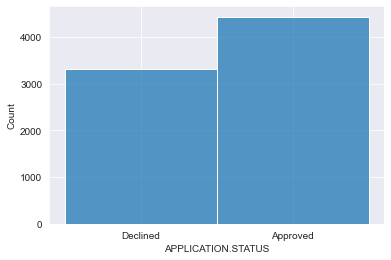

In [10]:
sns.set_style('darkgrid')
sns.histplot(Train['APPLICATION.STATUS'])
plt.show()

BELOW IS GRAPHICAL REPRESENTATON FOR NUMBER OF APPLICATION APPROVED AND DECLINED ACCORDING TO APPPLICANT AGE

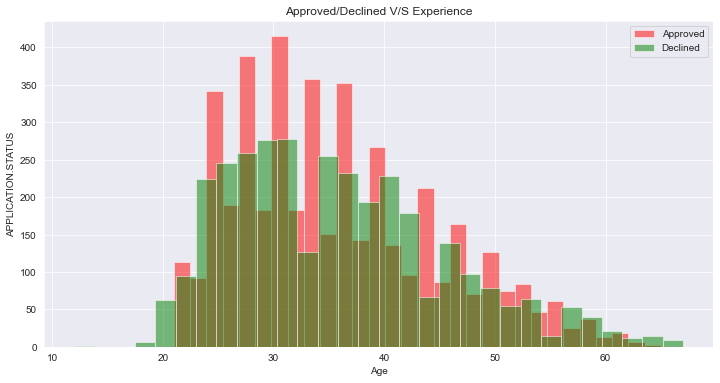

In [11]:
plt.figure(figsize=(12,6))
plt.hist(Train[Train['APPLICATION.STATUS']=='Approved']['AGE'],bins=30,alpha=0.5,color='red', label='Approved')
plt.hist(Train[Train['APPLICATION.STATUS']=='Declined']['AGE'],bins=30,alpha=0.5,color='green', label='Declined')
plt.legend()
plt.xlabel('Age')
plt.ylabel('APPLICATION.STATUS')
plt.title('Approved/Declined V/S Experience')
plt.show()

BELOW IS GRAPHICAL REPRESENTATON FOR NUMBER OF APPLICATION APPROVED AND DECLINED ACCORDING TO APPPLICANT EDUCATION

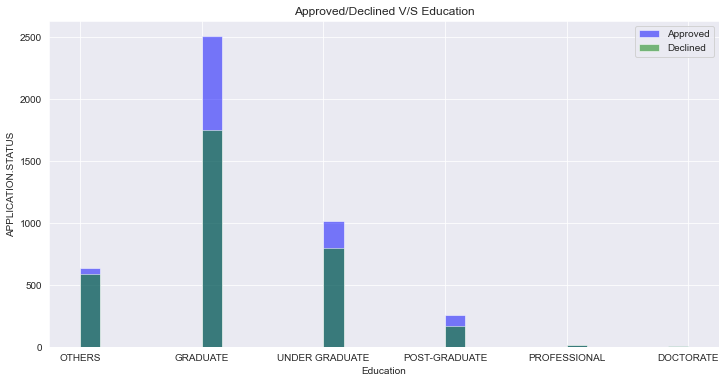

In [12]:
plt.figure(figsize=(12,6))
plt.hist(Train[Train['APPLICATION.STATUS']=='Approved']['EDUCATION'],bins=30,alpha=0.5,color='blue', label='Approved')
plt.hist(Train[Train['APPLICATION.STATUS']=='Declined']['EDUCATION'],bins=30,alpha=0.5,color='green', label='Declined')
plt.legend()
plt.xlabel('Education')
plt.ylabel('APPLICATION.STATUS')
plt.title('Approved/Declined V/S Education')
plt.show()

BELOW IS GRAPHICAL REPRESENTATON FOR NUMBER OF APPLICATION APPROVED AND DECLINED ACCORDING TO APPPLICANT SCORE
THERE IS MEANINGFUL INSIGHT THAT WE CAN READ FROM BELOW GRAPH AS APPLICANT WITH HIGH CIBIL SCORE HAVE MORE APPROVAL 

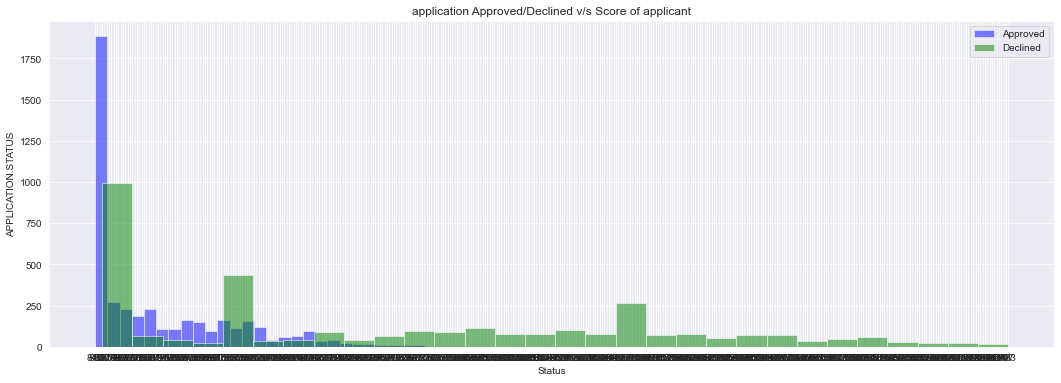

In [13]:
plt.figure(figsize=(18,6))
plt.hist(Train[Train['APPLICATION.STATUS']=='Approved']['CIBIL.SCORE'],bins=30,alpha=0.5,color='blue', label='Approved')
plt.hist(Train[Train['APPLICATION.STATUS']=='Declined']['CIBIL.SCORE'],bins=30,alpha=0.5,color='green', label='Declined')
plt.legend()
plt.xlabel('Status')
plt.ylabel('APPLICATION.STATUS')
plt.title('application Approved/Declined v/s Score of applicant')
plt.show()

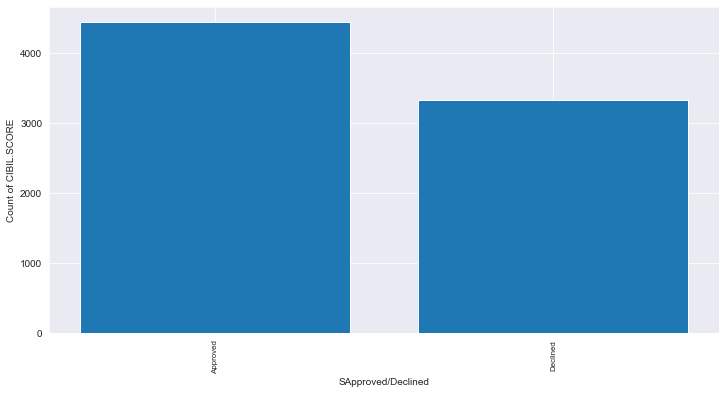

In [14]:
plt.figure(figsize=(12,6))
app = Train.groupby('APPLICATION.STATUS').count()

stk = [stk for stk, df in Train.groupby('APPLICATION.STATUS')]
plt.bar(stk,app['CIBIL.SCORE'])
plt.xticks(stk, rotation = 'vertical', size = 8)
plt.ylabel('Count of CIBIL.SCORE')
plt.xlabel('SApproved/Declined')
plt.show()

BELOW IS GRAPHICAL REPRESENTATON FOR CIBIL SCORE OF APPLICANTS AND THERE EDUCATION
THERE IS MEANINGFUL INSIGHT THAT WE CAN READ FROM BELOW GRAPH AS GRADUATE APPLICANTS HAVE HIGH CIBIL SCORE

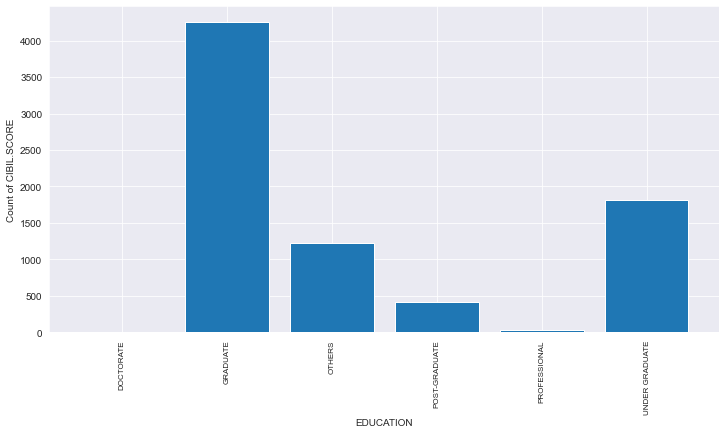

In [15]:
plt.figure(figsize=(12,6))
app = Train.groupby('EDUCATION').count()

stk = [stk for stk, df in Train.groupby('EDUCATION')]
plt.bar(stk,app['CIBIL.SCORE'])
plt.xticks(stk, rotation = 'vertical', size = 8)
plt.ylabel('Count of CIBIL.SCORE')
plt.xlabel('EDUCATION')
plt.show()

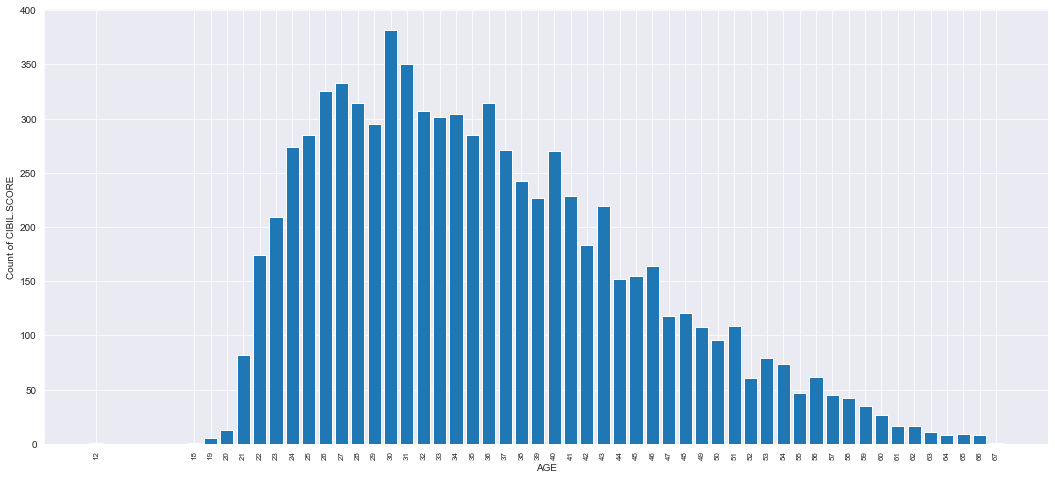

In [16]:
plt.figure(figsize=(18,8))
app = Train.groupby('AGE').count()

stk = [stk for stk, df in Train.groupby('AGE')]
plt.bar(stk,app['CIBIL.SCORE'])
plt.xticks(stk, rotation = 'vertical', size = 8)
plt.ylabel('Count of CIBIL.SCORE')
plt.xlabel('AGE')
plt.show()

BELOW IS GRAPHICAL REPRESENTATON FOR NUMBER OF APPLICATIONS APPROVED AND DECLINED

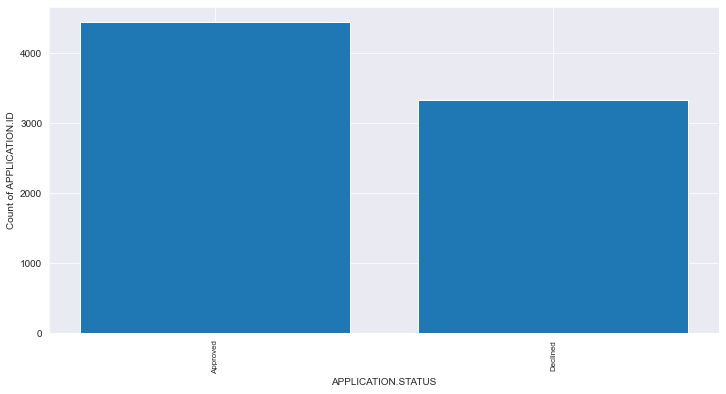

In [17]:
plt.figure(figsize=(12,6))
app = Train.groupby('APPLICATION.STATUS').count()

stk = [stk for stk, df in Train.groupby('APPLICATION.STATUS')]
plt.bar(stk,app['APPLICATION.ID'])
plt.xticks(stk, rotation = 'vertical', size = 8)
plt.ylabel('Count of APPLICATION.ID')
plt.xlabel('APPLICATION.STATUS')
plt.show()

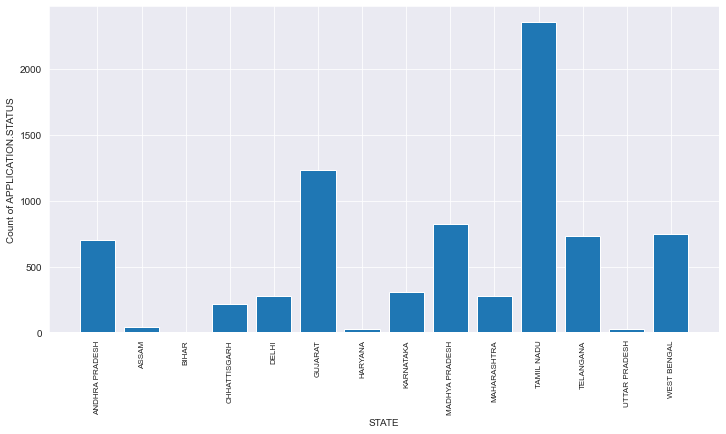

In [18]:
plt.figure(figsize=(12,6))
app = Train.groupby('STATE').count()

stk = [stk for stk, df in Train.groupby('STATE')]
plt.bar(stk,app['APPLICATION.STATUS'])
plt.xticks(stk, rotation = 'vertical', size = 8)
plt.ylabel('Count of APPLICATION.STATUS')
plt.xlabel('STATE')
plt.show()

#IN THIS STEP, WE ARE HANDLING DATE COLUMN OF TRAIN DATA

In [19]:
Train['APP.DATE']=pd.to_datetime(Train['APP.DATE'],errors='coerce',format='%Y-%m-%d',utc=True)
Train['year'] = Train['APP.DATE'].dt.year
Train['month'] = Train['APP.DATE'].dt.month
Train['day'] = Train['APP.DATE'].dt.day

Y = Train['APPLICATION.STATUS']

Train = Train.drop(['APP.DATE','TIME.STAMP','APPLICATION.STATUS'],axis=1)

#IN THIS STEP, WE ARE HANDLING DATE COLUMN OF TEST DATA

In [20]:
Test['APP.DATE']=pd.to_datetime(Test['APP.DATE'],errors='coerce',format='%Y-%m-%d',utc=True)
Test['year'] = Test['APP.DATE'].dt.year
Test['month'] = Test['APP.DATE'].dt.month
Test['day'] = Test['APP.DATE'].dt.day
Test = Test.drop(['APP.DATE','TIME.STAMP','APPLICATION.STATUS'],axis=1)

In [21]:
Test['APPLICATION.SCORE'] = Test['APPLICATION.SCORE'].astype(object).astype(int)

In [22]:
# print(Train.info())
# print(Test.info())

In [23]:
# print(Train.isnull().sum())
# print(Test.isnull().sum())

#IN THIS STEP, WE ARE TREATING CATEGORICAL AND NUMERICAL DATA SEPERATELY

In [24]:
categorical_train = [a for a in Train.columns if Train[a].dtype=='O']
numerical_train = [a for a in Train.columns if Train[a].dtype!='O']

Train_catg = Train[categorical_train]
Train_Num = Train[numerical_train]


categorical_test = [a for a in Test.columns if Test[a].dtype=='O']
numerical_test = [a for a in Test.columns if Test[a].dtype!='O']

Test_catg = Test[categorical_test]
Test_Num = Test[numerical_test]

#IN THIS STEP WE ARE SCALING THE FEATURES OF TRAIN AND TEST DATA

In [25]:
from sklearn.preprocessing import LabelEncoder
Train_catg = Train_catg.apply(LabelEncoder().fit_transform)
Test_catg = Test_catg.apply(LabelEncoder().fit_transform)

LE=LabelEncoder()
LE.fit_transform(Y)
Y = LE.fit_transform(Y)

F_Test = pd.concat([Test_catg,Test_Num], axis=1, ignore_index=True)

F_Train = pd.concat([Train_catg,Train_Num], axis=1, ignore_index=True)

X = F_Train.values

IN THIS STEP, WE ARE TRYING TO CHECK WETHER CONCATINATION IN ABOVE STEP DOESN NOT DROP ANY COLUMN

In [26]:
print(len(Test))
print(len(Train))
print(len(F_Test))
print(len(F_Train))

print(len(Test.columns))
print(len(Train.columns))
print(len(F_Test.columns))
print(len(F_Train.columns))

19189
7759
19189
7759
31
31
31
31


#IN THIS STEP WE ARE DIVIDING TRAIN DATA INTO x_train, x_test, y_train,y_test TO SELECT MODEL WITH BEST ACCURACY. 
#REASON BEHIND THIS STEP IS TEST DATA HAS 'APPLICATION.STATUS' VALUES AS NULL

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
sc.transform(x_test)

array([[ 1.07582984, -0.66040948,  1.14924352, ...,  0.        ,
         0.        ,  0.53579071],
       [-1.26915639, -0.66040948,  1.14924352, ...,  0.        ,
         0.        , -1.52120818],
       [-1.61568269, -0.66040948, -1.27089372, ...,  0.        ,
         0.        , -1.52120818],
       ...,
       [-1.04130348, -0.66040948,  1.14924352, ...,  0.        ,
         0.        ,  0.02154099],
       [-0.36249167,  1.51421207,  1.14924352, ...,  0.        ,
         0.        ,  1.05004044],
       [-0.76123427, -0.66040948, -0.86753751, ...,  0.        ,
         0.        ,  0.53579071]])

# LOGISTIC REGRESSION MODEL IS GIVING 56% ACCURACY

In [28]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_test,y_pred)
print("accuracy score of LogisticRegression = ",ac1)

accuracy score of LogisticRegression =  0.5612113402061856


# RANDOM FOREST MODEL IS GIVING 95% ACCURACY

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
ac2 = accuracy_score(y_test,y_pred)
print("accuracy score of RandomForestClassifier = ",ac2)

accuracy score of RandomForestClassifier =  0.9555412371134021


# XG BOOST MODEL IS GIVING 95% ACCURACY

In [30]:
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bytree = 0.9, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print("accuracy score of XGBClassifier = ",ac)

[11:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[847  24]
 [ 39 642]]
accuracy score of XGBClassifier =  0.9594072164948454


# MODEL IMPLEMENTATION ON GIVEN DATASET

In [31]:
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bytree = 0.9, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
classifier.fit(X,Y)

Y_pred = classifier.predict(F_Test)

[11:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
